## Asset Pricing with Finite Markov State Process

#### John Stachurski

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import quantecon as qe

We'll take the state process to be a discretized AR(1) process

$$ X_{t+1} = \rho X_t + \sigma \xi_{t+1} $$

with the discretization based on Tauchen's method.

In [2]:
ρ, σ = 0.9, 0.1
n = 20 
mc = qe.tauchen(ρ, σ, n=n)

In simulations, the process looks like this:

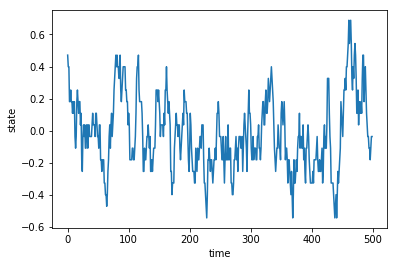

In [22]:
fig, ax = plt.subplots()
ax.plot(mc.simulate(500))
ax.set(ylabel='state', xlabel='time')
plt.show()

### The Risk Neutral Case

For the dividend function we'll assume that $d(x) = \exp(x)$, while $\beta = 0.96$.  Let's try solving for prices:

In [41]:
β = 0.96
Q = mc.P
d = np.exp(mc.state_values)
I = np.identity(n)
p = np.linalg.solve(I - β * Q, β * Q @ d)

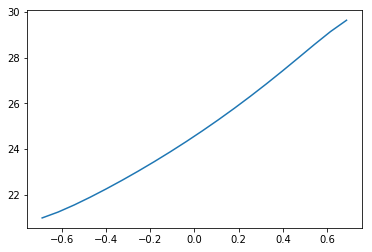

In [42]:
fig, ax = plt.subplots()
ax.plot(mc.state_values, p)
plt.show()

We get the same function if we use

$$ p = \sum_{i=1}^\infty (\beta Q)^i d $$

and truncate the sum at some large value.

In [43]:
A = β * Q
p = A @ d
for i in range(1000):
    A = β * Q @ A
    p += A @ d

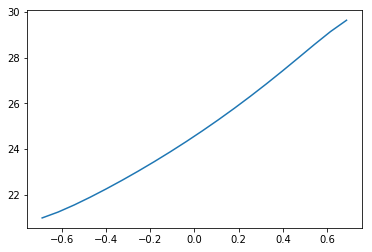

In [44]:
fig, ax = plt.subplots()
ax.plot(mc.state_values, p)
plt.show()

To see how prices change with parameters, let's write a function that computes prices.

In [45]:
def compute_prices(β=0.96, ρ=0.9, σ=0.1, n=20):
    mc = qe.tauchen(ρ, σ, n=n)
    Q = mc.P
    d = np.exp(mc.state_values)
    I = np.identity(n)
    p = np.linalg.solve(I - β * Q, β * Q @ d)
    return p

Let's see how prices change with persistence of the state:

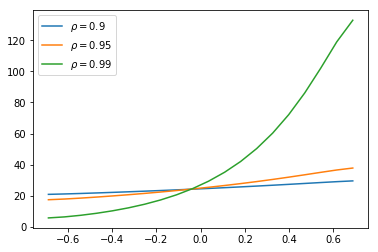

In [46]:
rho_vals = 0.9, 0.95, 0.99
fig, ax = plt.subplots()
for ρ in rho_vals:
    ax.plot(mc.state_values, compute_prices(ρ=ρ), label=f'$\\rho={ρ}$')
ax.legend()
plt.show()

Can you explain this figure?

### The Stochastic Discount Case (CAPM)

Now consider the Lucas (1978) case where

* $C_t = D_t$
* $M_{1+t} = m(X_t, X_{t+1}) = \beta u'(C_{t+1}) / u'(C_t)$

As before, $\{X_t\}$ obeys a finite state Markov chain with Markov matrix $Q$

Let $D_t = d(X_t) = \exp(X_t)$ and let utility have the CRRA form

$$ 
    u(c) = \frac{c^{1-\gamma}}{1 - \gamma} 
    \quad \text{where} \quad
    \gamma > 0
$$

Hence 

$$ m(x, y) = \beta \exp(-\gamma (y - x)) $$

and 

$$ K(x, y) = \beta \exp(-\gamma (y - x)) Q(x, y) $$

We'll go straight to a function that solves for prices via

$$ p = (I - K)^{-1} K d $$

In [48]:
def compute_prices_crra(β=0.96, ρ=0.9, σ=0.1, γ=2.5, n=20):
    mc = qe.tauchen(ρ, σ, n=n)
    Q = mc.P
    d = np.exp(mc.state_values)
    I = np.identity(n)
    K = np.empty_like(I)
    for i, x in enumerate(mc.state_values):
        for j, y in enumerate(mc.state_values):
            K[i, j] = β * np.exp(-γ * (y - x)) * Q[i, j]
            
    p = np.linalg.solve(I - K, K @ d)
    return p

Here's prices at the default values:

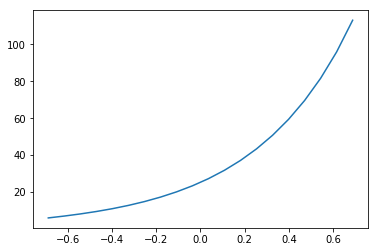

In [49]:
fig, ax = plt.subplots()
ax.plot(mc.state_values, compute_prices_crra())
plt.show()

How do prices change with increasing risk aversion?

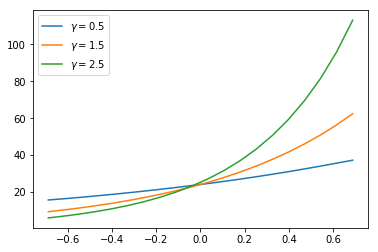

In [55]:
gamma_vals = 0.5, 1.5, 2.5
fig, ax = plt.subplots()
for γ in gamma_vals:
    ax.plot(mc.state_values, 
            compute_prices_crra(γ=γ), 
            label=f'$\\gamma={γ}$')
ax.legend()
plt.show()

Can  you interpret this figure?